# Imports

In [3]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.dpi'] = 75

## Data Collection

In [2]:
!pip install opendatasets

In [3]:
url = "https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam/"
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: asestovic
Your Kaggle Key: ········


100%|████████████████████████████████████████| 660M/660M [00:41<00:00, 16.7MB/s]


## Data setup

In [5]:
#Finding the folder where our datasets are stored
data_dir = "./game-recommendations-on-steam"
os.listdir(data_dir)

['recommendations.csv', 'users.csv', 'games.csv', 'games_metadata.json']

In [6]:
#Creating DataFrames of our datasets using pandas
recommendations_df = pd.read_csv('game-recommendations-on-steam/recommendations.csv')
users_df = pd.read_csv('game-recommendations-on-steam/users.csv')
games_df = pd.read_csv('game-recommendations-on-steam/games.csv')

In [7]:
#Quick look at users_df
users_df.head()

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2


In [8]:
#Quick look at games_df
games_df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [9]:
#Quick look at recommendations_df
recommendations_df.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4


Preliminary data observations have allowed me to understand what variables are part of available analysis and is a good point for me to make early project goals and data questions.

Data Questions:
- What is the average/median/min/max for key variables in 'users' and 'games' datasets?
- What are the distributions of our key variables and is there anything that is strange/unexpected?
    
Project Goals:
- I would like to understand the relationship between the number of items purchased in the Steam store and the number of reviews using the 'users' data.

- Are positive reviews positively correlated to the price of the Steam product? What about whether positive reviews are positively correlated to negative changes of price (Reduction of the original price to the final price that is observed)?

- Is there a relationship between the number of reviews and the ratio of reviews that are positive?

- Is it more likely that a user will recommend a Steam product the more hours they have used it?

- Is there a difference in positive ratios depending on whether a user is using windows/linux/mac (Is there a user base that is more likely to give positive reviews than another)?

## Data Visualisation 

In [10]:
# Beginning with 'user' data

In [11]:
# Finding the average/median/min/max for the number of product purchases on Steam and number of reviews published for each user
def getsummary(data, variable):
    mean_v = np.round(data[variable].mean(), 2)
    median_v = np.round(data[variable].median(), 2)
    min_v = np.round(data[variable].min(), 2)
    max_v = np.round(data[variable].max(), 2)
    return print(f"For the variable '{variable}'\nthe mean is: {mean_v} \nthe median is: {median_v}\nthe min/max are: {min_v} and {max_v}")

In [12]:
getsummary(users_df, 'products')

For the variable 'products'
the mean is: 116.37 
the median is: 55.0
the min/max are: 0 and 32214


In [13]:
getsummary(users_df, 'reviews')

For the variable 'reviews'
the mean is: 2.88 
the median is: 1.0
the min/max are: 0 and 6045


I would like to understand the relationship between the number of items purchased in the Steam store and the number of reviews using the 'users' data.

<Axes: xlabel='reviews', ylabel='Density'>

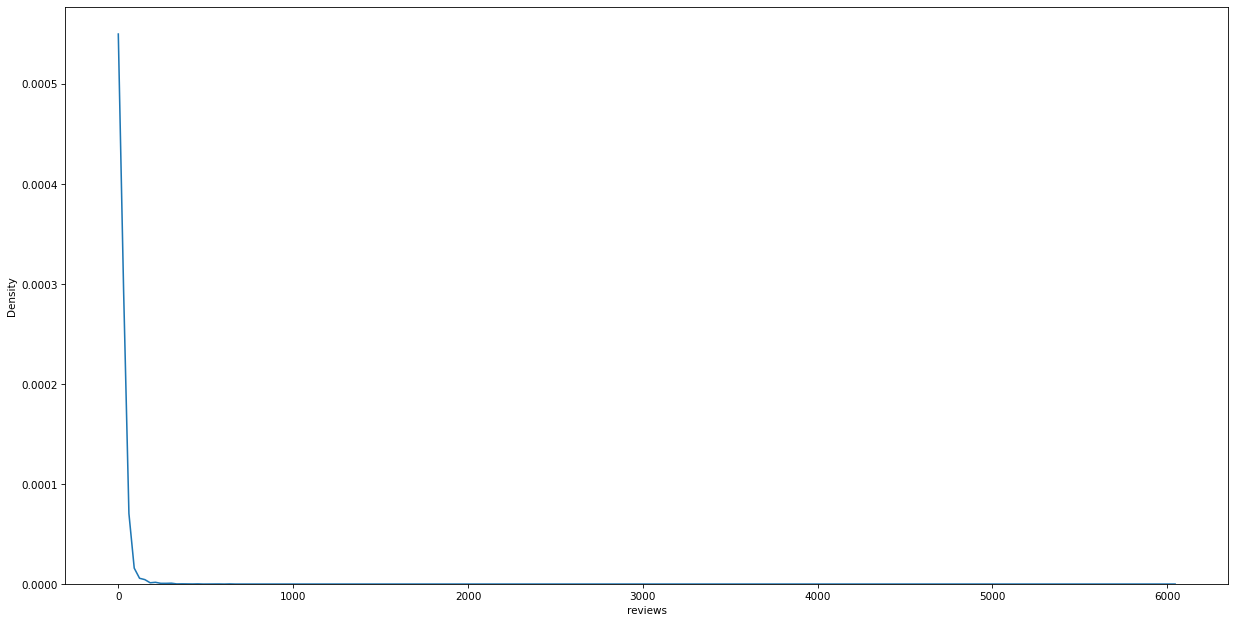

In [14]:
sns.kdeplot(data = users_df, x='reviews')

This kernel density estimation is not particularly useful other than telling us that many of the user's which have given thousands of reviews are serious outliers to the data. Therefore, I cleaned the data, by only accounting for those who gave reviews and those that belonged in the 95% share of population, and plotted a new historgram to display the distribution of our data for "reviews".

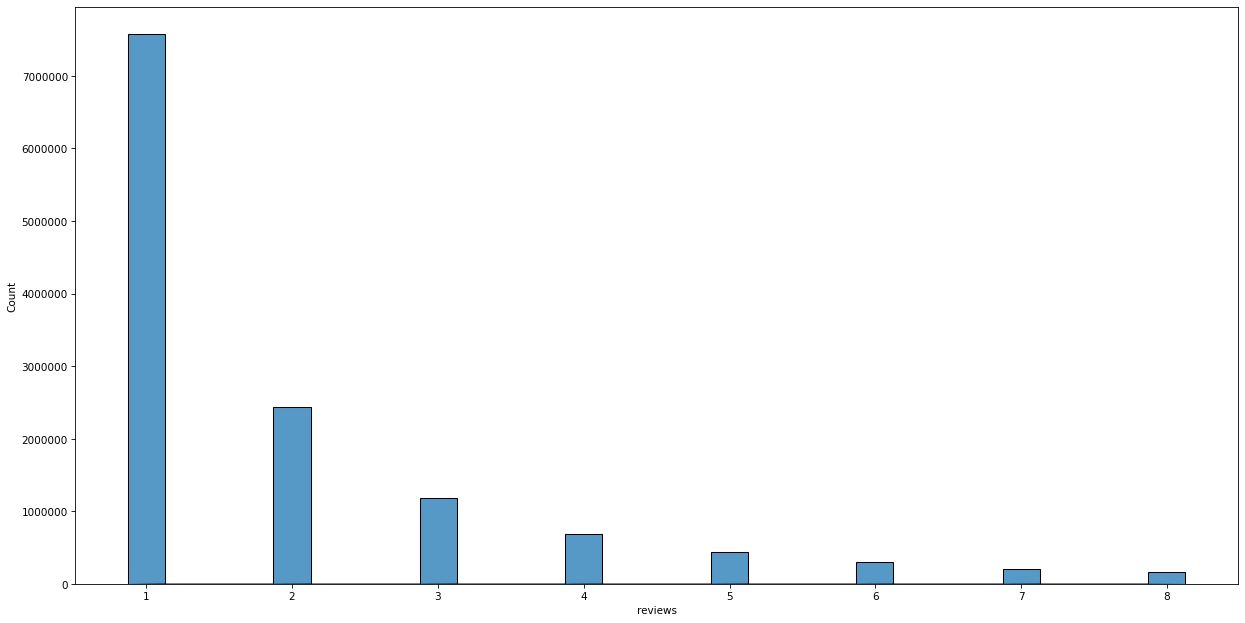

In [15]:
engaged_users_reviews = users_df['reviews'].loc[users_df['reviews']>0].copy()
engaged_users_reviews = engaged_users_reviews.loc[engaged_users_reviews<engaged_users_reviews.quantile(0.95)]
reviews_sns_hist = sns.histplot(data=engaged_users_reviews, shrink =30)
#The yticks were giving scientific format for large numbers, so I fixed that with the code below
reviews_sns_hist.yaxis.get_major_formatter().set_scientific(False)

note: We observe a decrease in the number of reviews that user's have made using the Steam application follow a quadratic function. 

In [16]:
fig1 = reviews_sns_hist.get_figure()
fig1.savefig("User-Reviews-Histogram")

<Axes: xlabel='products', ylabel='Density'>

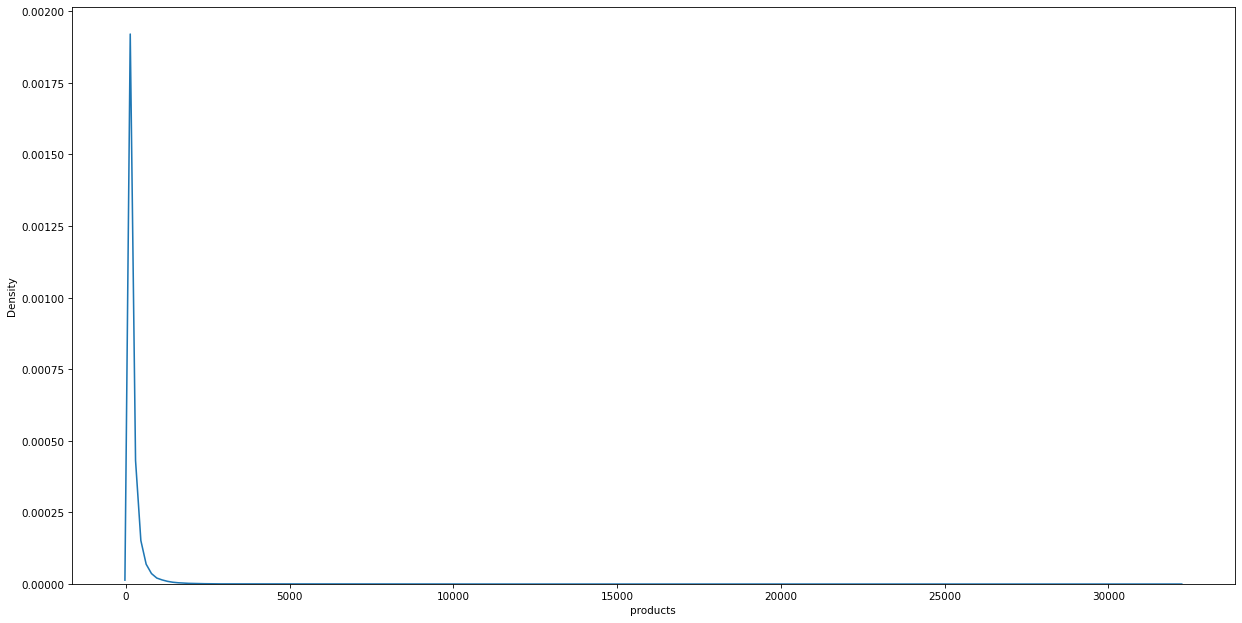

In [17]:
#User product purchases
sns.kdeplot(data= users_df, x = 'products')

This is a very similar looking KDE plot to the one for 'reviews' with a difference in the number of users with 0 purchases.

In [18]:
engaged_user_products = users_df['products'].loc[users_df['products']>0].copy()
engaged_user_products = users_df['products'].loc[users_df['products']<users_df.products.quantile(0.99)]


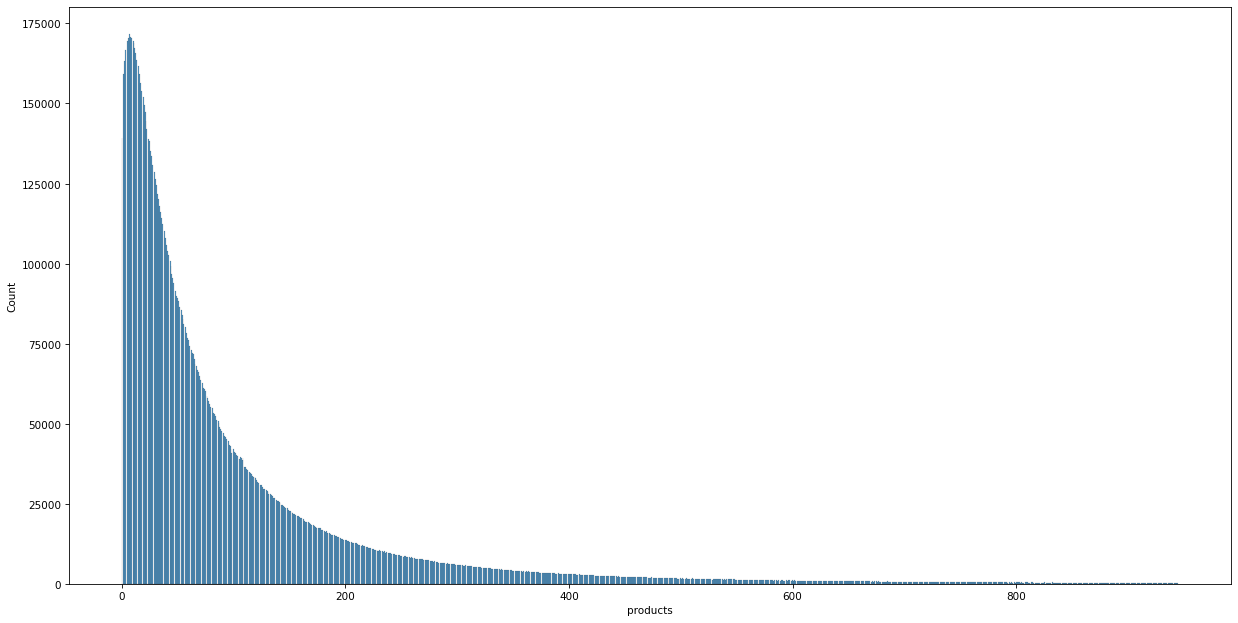

In [19]:
products_sns_hist = sns.histplot(data = engaged_user_products)

In [20]:
fig2 = products_sns_hist.get_figure()
fig2.savefig("User-Products_histogram")

In [21]:
#Plotting a scatter of user reviews and products purchased.

In [22]:
# Setting up the data to only take into account the users that have made both a review and a purchase, as well 
# as only accounting for non-extreme values
engaged_users_df = users_df.loc[(users_df['reviews']>0) & (users_df['products']>0)].copy()
engaged_users_df = engaged_users_df.loc[(engaged_users_df['reviews']<engaged_users_df['reviews'].quantile(0.95)) & (engaged_users_df['products']<engaged_users_df['products'].quantile(0.99))]

In [23]:
aps = range(min(engaged_users_df['reviews']), max(engaged_users_df['reviews']+1))
average_p_per_r = []
for i in aps:
    average_p_per_r.append(engaged_users_df['products'].loc[engaged_users_df['reviews'] == i].mean())


In [24]:
scatter_data_users = zip(aps, average_p_per_r)
scatter_data_users_df = pd.DataFrame(scatter_data_users, columns = ['aps', 'average_p_per_r'])


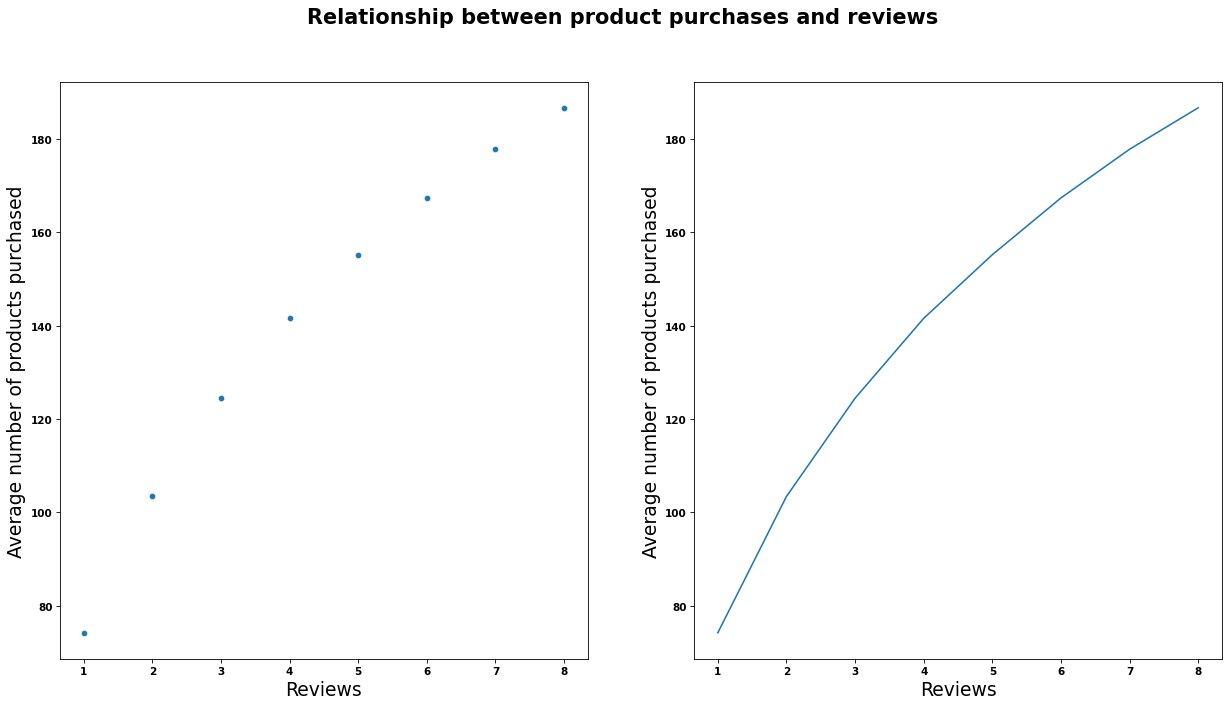

In [25]:
user_scatter = plt.subplot(1,2,1)
plt.suptitle("Relationship between product purchases and reviews", size = 20, weight = 'bold')
sns.scatterplot(data = scatter_data_users_df, x = 'aps', y = 'average_p_per_r')
plt.xlabel("Reviews", size =18)
plt.xticks(weight='bold')
plt.ylabel("Average number of products purchased", size = 18)
plt.yticks(weight='bold')
user_scatter = plt.subplot(1,2,2)
sns.lineplot(data = scatter_data_users_df, x = 'aps', y = 'average_p_per_r')
plt.xlabel("Reviews", size = 18)
plt.xticks(weight='bold')
plt.ylabel("Average number of products purchased", size = 18)
plt.yticks(weight='bold')
plt.subplots_adjust(wspace=0.2)

In [26]:
fig3 = user_scatter.get_figure()
fig3.savefig("Scatterplot_users")

Are positive reviews positively correlated to the price of the Steam product? What about whether positive reviews are positively correlated to negative changes of price (Reduction of the original price to the final price that is observed)?

In [27]:
#First to answer our data questions:

getsummary(games_df, 'positive_ratio')

For the variable 'positive_ratio'
the mean is: 77.05 
the median is: 81.0
the min/max are: 0 and 100


In [28]:
games_df

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


In [29]:
getsummary(games_df, 'user_reviews')
#Note that since we are using a different smaller dataset our summary of the user reviews gives a different result

For the variable 'user_reviews'
the mean is: 1824.42 
the median is: 49.0
the min/max are: 10 and 7494460


In [30]:
getsummary(games_df, 'price_final')

For the variable 'price_final'
the mean is: 8.62 
the median is: 4.99
the min/max are: 0.0 and 299.99


In [31]:
getsummary(games_df, 'price_original')
#One observation we can make here is that new prices are lower on average than original ones while the median is the same

For the variable 'price_original'
the mean is: 8.73 
the median is: 4.99
the min/max are: 0.0 and 299.99


In [32]:
getsummary(games_df, 'discount')
#Since the median is zero it shows that most products have no discounts applied but as the median is greater that 5, the products with discounts have on average discounts that are larger than 10

For the variable 'discount'
the mean is: 5.59 
the median is: 0.0
the min/max are: 0.0 and 90.0


Text(62, 0.02, 'The average value')

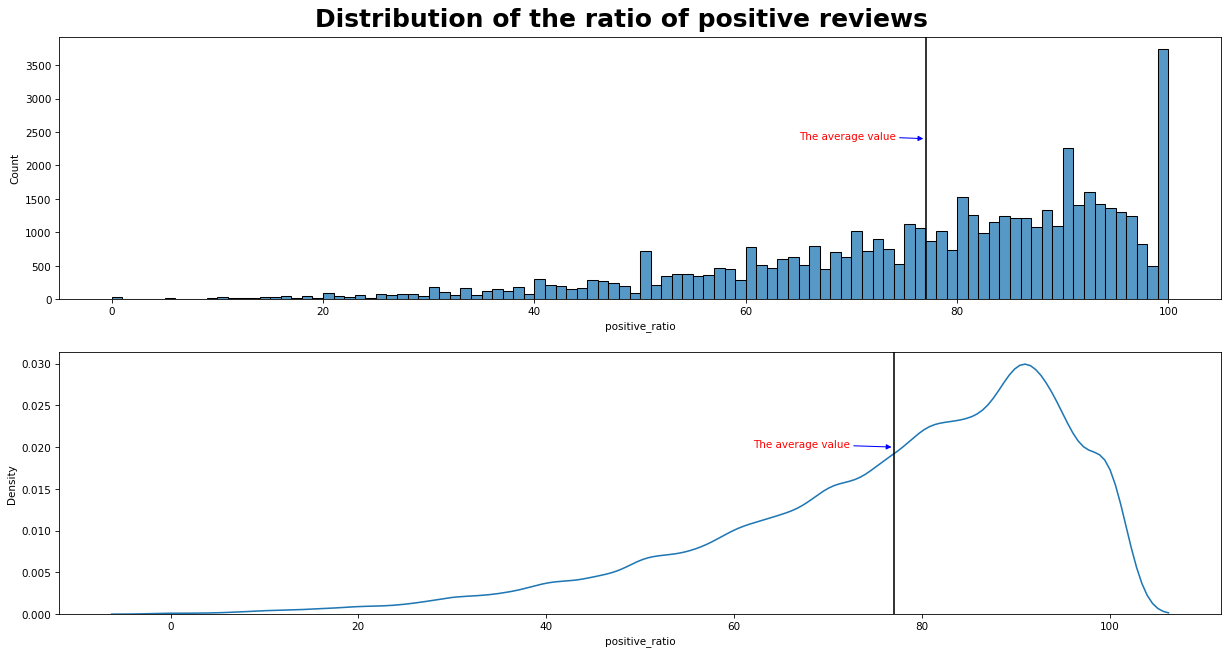

In [52]:
plt.subplot(2,1,1)
plt.suptitle("Distribution of the ratio of positive reviews", fontsize = 24, y = 0.92, weight = 'bold')
dist_pr = sns.histplot(data = games_df, x = 'positive_ratio', bins = 100)
plt.axvline(x = games_df.positive_ratio.mean(), color = 'black')
plt.annotate('The average value', xytext = (65,2400), color = 'r', fontsize = 10, xy = (77,2400), arrowprops=dict(arrowstyle= '-|>', color='blue'))
plt.subplot(2,1,2)
dist_pr = sns.kdeplot(data = games_df, x = 'positive_ratio')
plt.axvline(x = games_df.positive_ratio.mean(), color = 'black')
plt.annotate('The average value', xytext = (62,0.02), color = 'red', fontsize = 10, xy = (77,0.02), arrowprops=dict(arrowstyle= '-|>', color='blue'))


In [34]:
fig4 = dist_pr.get_figure()
fig4.savefig('Distribution of ratio of positive reviews')

*Note that using kernel density estimation may not be preferable in the case of discrete values

Text(62, 0.02, 'The average value')

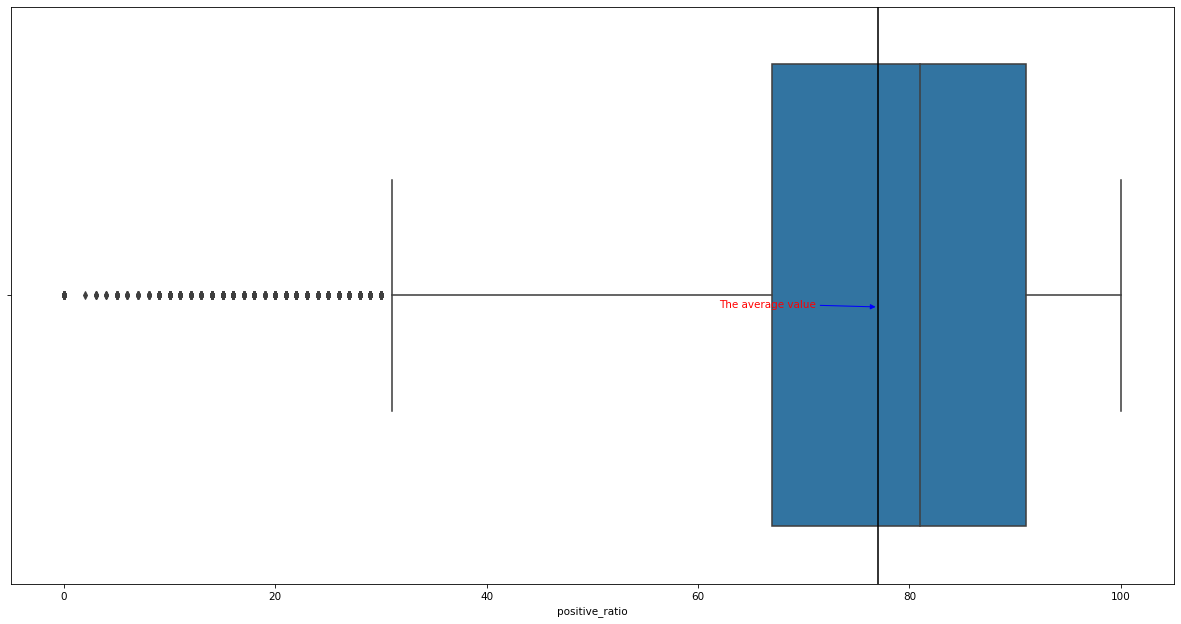

In [51]:
#Box Plot
dist_pr = sns.boxplot(data = games_df, x = 'positive_ratio')
plt.axvline(x = games_df.positive_ratio.mean(), color = 'black')
plt.annotate('The average value', xytext = (62,0.02), color = 'red', fontsize = 10, xy = (77,0.02), arrowprops=dict(arrowstyle= '-|>', color='blue'))

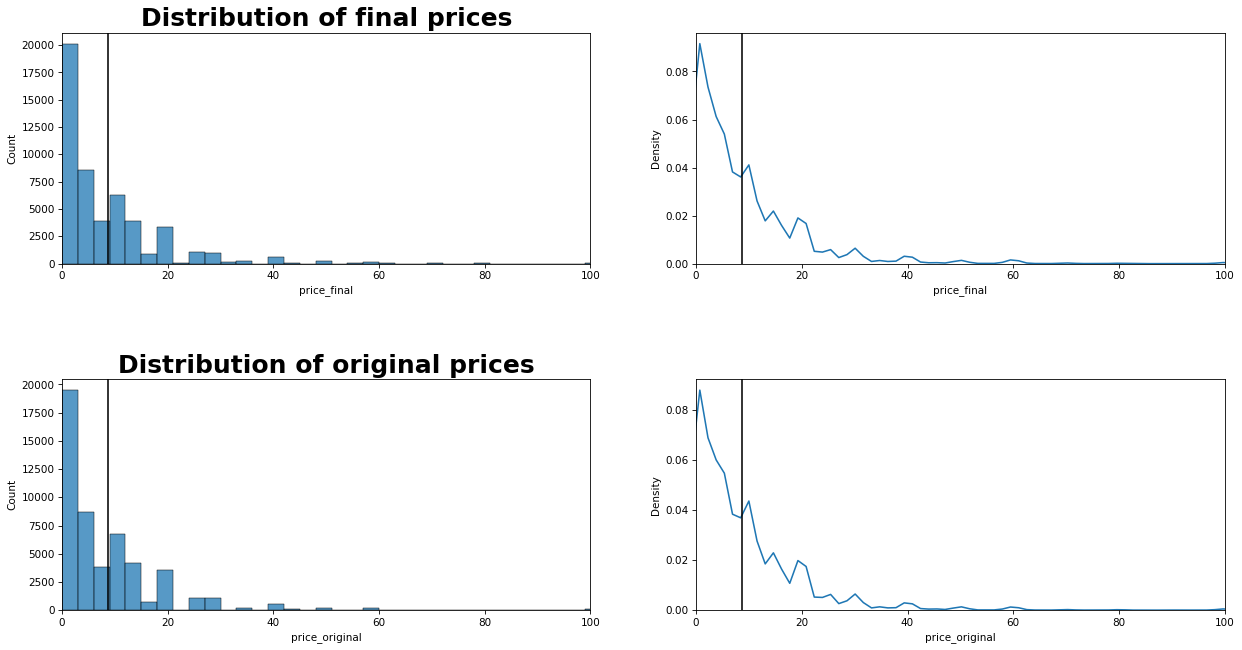

In [79]:
# Distribution of final and original prices
plt.subplot(2,2,1)
plt.title("Distribution of final prices", fontsize = 24, y = 1, weight = 'bold')
dist_prices = sns.histplot(data = games_df, x = 'price_final', bins = 100)
plt.axvline(x = games_df.price_final.mean(), color = 'black')
plt.xlim(0,100)
#plt.annotate('The average value', xytext = (65,2400), color = 'r', fontsize = 10, xy = (77,2400), arrowprops=dict(arrowstyle= '-|>', color='blue'))
plt.subplot(2,2,2)
dist_prices = sns.kdeplot(data = games_df, x = 'price_final')
plt.axvline(x = games_df.price_final.mean(), color = 'black')
#plt.annotate('The average value', xytext = (62,0.02), color = 'red', fontsize = 10, xy = (77,0.02), arrowprops=dict(arrowstyle= '-|>', color='blue'))
plt.xlim(0,100)
plt.subplot(2,2,3)
plt.title("Distribution of original prices", fontsize = 24, y = 1, weight = 'bold')
dist_prices = sns.histplot(data = games_df, x = 'price_original', bins = 100)
plt.axvline(x = games_df.price_original.mean(), color = 'black')
plt.xlim(0,100)
#plt.annotate('The average value', xytext = (65,2400), color = 'r', fontsize = 10, xy = (77,2400), arrowprops=dict(arrowstyle= '-|>', color='blue'))
plt.subplot(2,2,4)
dist_prices = sns.kdeplot(data = games_df, x = 'price_original')
plt.axvline(x = games_df.price_original.mean(), color = 'black')
#plt.annotate('The average value', xytext = (62,0.02), color = 'red', fontsize = 10, xy = (77,0.02), arrowprops=dict(arrowstyle= '-|>', color='blue'))
plt.xlim(0,100)
plt.subplots_adjust(hspace=0.5)

In [81]:
fig5 = dist_prices.get_figure()
fig5.savefig('Distribution of original and final prices')

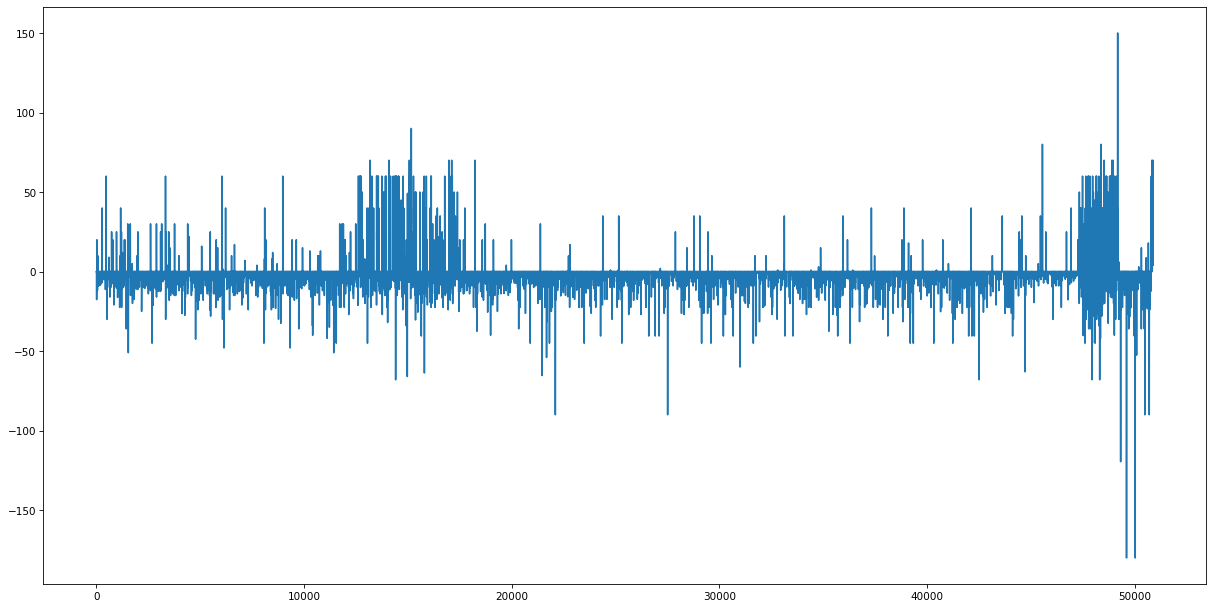

In [99]:
#Creating the changes in prices variable
price_change = games_df.price_final - games_df.price_original
sns.lineplot(price_change)


(1.0, 200.0)

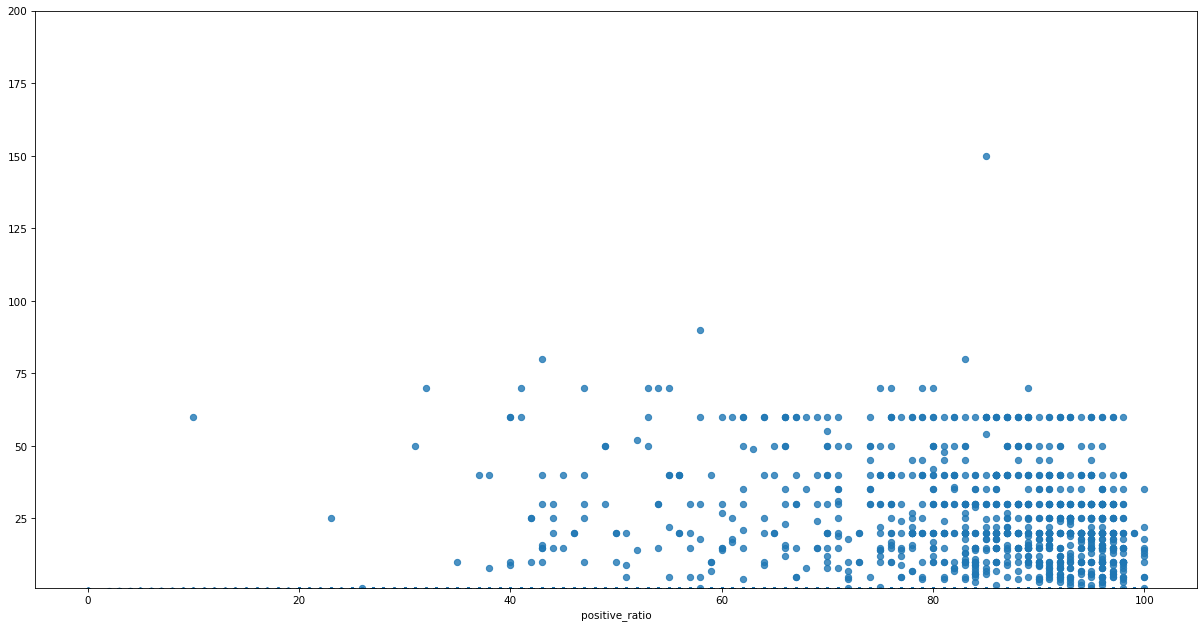

In [101]:
sns.regplot(x=games_df.positive_ratio, y = price_change)
plt.ylim(1,200)

In [102]:
#There seems to be a slight positive relationship between negative price changes and positive review ratios